<a href="https://colab.research.google.com/github/Hubobv/AI_W4/blob/main/AI_W6_11_03_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install -U scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 36.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=6e796c07968ce4de728cf3fb931dc2c982e0232652d6fe0f03b032434cb2d43b
  Stored in directory: /root/.cache/pip/wheels/32/2c/a1/a90a7d7dd8448ec029f298a61f3490275e99b17aa348be675c
Successfully built scikit-fuzzy


109.99999999999982


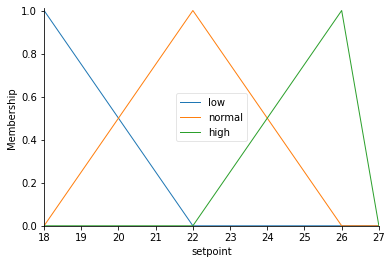

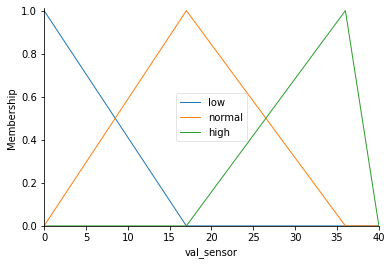

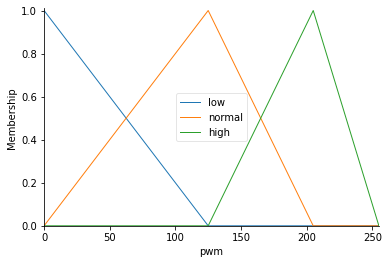

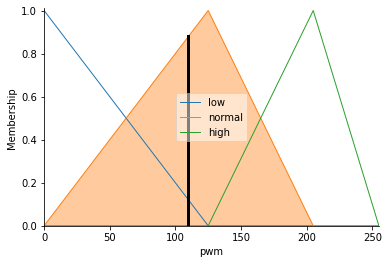

In [28]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
setpoint = ctrl.Antecedent(np.arange(18,28,1),'setpoint')
val_sensor = ctrl.Antecedent(np.arange(0,41,1),'val_sensor')
pwm = ctrl.Consequent(np.arange(0,256,1),'pwm')
hz = ctrl.Consequent(np.arange(0,61,1),'hz')

setpoint['low'] = fuzz.trimf(setpoint.universe,[18,18,22])
setpoint['normal'] = fuzz.trimf(setpoint.universe,[18,22,26])
setpoint['high'] = fuzz.trimf(setpoint.universe,[22,26,27])

val_sensor['low'] = fuzz.trimf(val_sensor.universe,[0,0,17])
val_sensor['normal'] = fuzz.trimf(val_sensor.universe,[0,17,36])
val_sensor['high'] = fuzz.trimf(val_sensor.universe,[17,36,40])

pwm['low'] = fuzz.trimf(pwm.universe,[0,0,125])
pwm['normal'] = fuzz.trimf(pwm.universe,[0,125,205])
pwm['high'] = fuzz.trimf(pwm.universe,[125,205,255])

rule1 = ctrl.Rule(setpoint['low']&val_sensor['low'],pwm['low'])
rule2 = ctrl.Rule(setpoint['low']&val_sensor['normal'],pwm['low'])
rule3 = ctrl.Rule(setpoint['normal']&val_sensor['normal'],pwm['normal'])
rule4 = ctrl.Rule(setpoint['normal']&val_sensor['high'],pwm['normal'])
rule5 = ctrl.Rule(setpoint['normal']&val_sensor['low'],pwm['normal'])
rule6 = ctrl.Rule(setpoint['high']&val_sensor['low'],pwm['normal'])
rule7 = ctrl.Rule(setpoint['high']&val_sensor['normal'],pwm['normal'])
rule8 = ctrl.Rule(setpoint['low']&val_sensor['high'],pwm['normal'])
rule9 = ctrl.Rule(setpoint['high']&val_sensor['high'],pwm['high'])

setpoint.view()
val_sensor.view()
pwm.view()

pwm_ctrl= ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9])
pwming = ctrl.ControlSystemSimulation(pwm_ctrl)

pwming.input['setpoint']=22
pwming.input['val_sensor']=17
pwming.compute()
print(pwming.output['pwm'])
pwm.view(sim=pwming)